# Detectar y analizar caras

Las soluciones de Computer Vision suelen necesitar una solución de inteligencia artificial (IA) para poder detectar, analizar o identificar caras humanas. Por ejemplo: supongamos que la empresa Northwind Traders ha decidido implementar una tienda inteligente, en la que los servicios de IA supervisan la tienda para identificar a los clientes que necesiten ayuda y avisar a los empleados para que los ayuden. Una forma de conseguirlo es realizar procesos de detección y análisis facial, es decir, determinar si hay caras en las imágenes y, si es así, analizar sus características.

![Un robot analizando una cara](../images/face_analysis.jpg)

## Usar el servicio Face, de Cognitive Services, para detectar caras

Supongamos que el sistema inteligente que Northwind Traders quiere crear necesita detectar a los clientes y analizar sus características faciales. En Microsoft Azure, puede usar **Face**, de Cognitive Services, para hacerlo.

### Crear un recurso de Cognitive Services

Para empezar, cree un recurso de **Cognitive Services** en su suscripción de Azure:

> **Nota**: Si ya tiene un recurso de Cognitive Services, abra su página de **Inicio rápido** en Azure Portal y copie la clave y el punto de conexión en la siguiente celda. En caso contrario, siga estos pasos para crear uno.

1. En la pestaña de otro explorador, abra Azure Portal (https://portal.azure.com) e inicie sesión con su cuenta de Microsoft.
2. Haga clic en el botón **&#65291;Crear un recurso**, busque *Cognitive Services* y cree un recurso de **Cognitive Services** con esta configuración:
    - **Suscripción**: *su suscripción de Azure*.
    - **Grupo de recursos**: *seleccione o cree un grupo de recursos con un nombre único.*
    - **Región**: *seleccione cualquier región disponible*:
    - **Nombre**: *escriba un nombre único*.
    - **Plan de tarifa**: S0
    - **Confirmo que he leído y comprendido las notificaciones**: seleccionado.
3. Espere a que la implementación finalice. Vaya al recurso de Cognitive Services y, en la página **Información general**, haga clic en el vínculo para administrar las claves del servicio. Necesitará el punto de conexión y las claves para conectarse a su recurso de Cognitive Services desde aplicaciones de cliente.

### Obtener la clave y el punto de conexión de un recurso de Cognitive Services

Para usar su recurso de Cognitive Services, las aplicaciones de cliente necesitan su clave de autenticación y su punto de conexión:

1. En Azure Portal, en la página **Claves y punto de conexión** de su recurso de Cognitive Services, copie la **Key1** de su recurso y péguela en el siguiente código, en sustitución de **YOUR_COG_KEY**.

2. Copie el **Punto de conexión** de su recurso y péguelo en el siguiente código, en sustitución de **YOUR_COG_ENDPOINT**.

3. Haga clic en Run cell <span>&#9655;</span>, en la parte superior izquierda de la celda siguiente, para ejecutar su código.

## Instalamos la biblioteca de Face Analysis

In [8]:
pip install --upgrade azure-cognitiveservices-vision-face

     |████████████████████████████████| 66 kB 3.7 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


## Asignamos nuestras credenciales
* Obtenidas del portal de Azure - CS - Face

In [9]:
key = ''
endpoint = ''

#print('Ready to use cognitive services at {} using key {}'.format(endpoint, key))

Ahora que tiene un recurso de Cognitive Services, puede usar el servicio Face para detectar caras humanas en la tienda.

Ejecute la celda de código siguiente para ver un ejemplo.

## Importamos las bibliotecas

In [11]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import os
%matplotlib inline

## Autenticamos nuestro 

In [15]:
# Crear un cliente de detección facial.
client = FaceClient(endpoint, CognitiveServicesCredentials(key))

## Importamos la clase Face

In [17]:
import sys
sys.path.append(os.path.realpath('..'))
from python_code import faces

## Agregamos la imagen a procesar

In [18]:
# Abrir una imagen
image_path = os.path.join('../data', 'face', 'store_cam2.jpg')
image_stream = open(image_path, "rb")

## Detección de Rostros

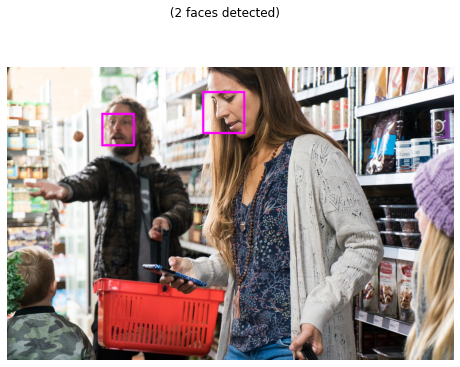

In [19]:
# Detectar caras
detected_faces = client.face.detect_with_stream(image=image_stream)

# Mostrar las caras (código en python_code/faces.py)
faces.show_faces(image_path, detected_faces)

Se asignará un ID a cada cara detectada, para que la aplicación pueda identificar cada cara detectada.

Ejecute la siguiente celda para ver los ID de la cara de algunos clientes.

## Cargamos la imagen

In [21]:
# Abrir una imagen
image_path = os.path.join('../data', 'face', 'store_cam3.jpg')
image_stream = open(image_path, "rb")

## Detección de Rostros

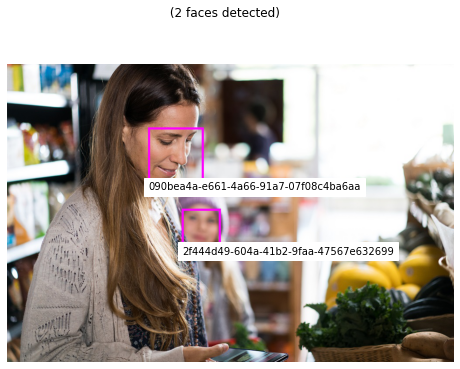

In [22]:
# Detectar caras
detected_faces = client.face.detect_with_stream(image=image_stream)

# Mostrar las caras (código en python_code/faces.py)
faces.show_faces(image_path, detected_faces, show_id=True)

## Analizar los atributos faciales

Face puede ir mucho más allá del simple reconocimiento facial. También puede analizar las características y expresiones de las caras para indicar la edad y el estado emocional. Ejecute el siguiente código para analizar los atributos faciales de un cliente.

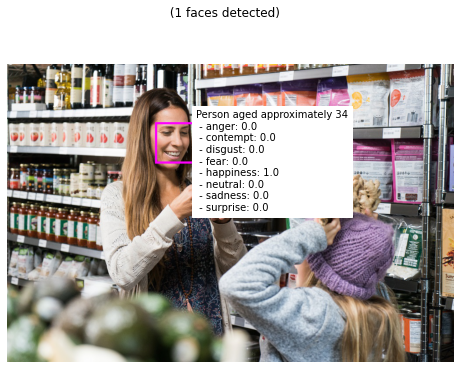

In [23]:
# Abrir una imagen
image_path = os.path.join('../data', 'face', 'store_cam1.jpg')
image_stream = open(image_path, "rb")

# Detectar caras y determinados atributos faciales
attributes = ['age', 'emotion']
detected_faces = client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

# Mostrar las caras y los atributos (código en python_code/faces.py)
faces.show_face_attributes(image_path, detected_faces)

Según las puntuaciones de emoción detectadas para el cliente de la imagen, el cliente parece contento con su experiencia de compra.

## Búsqueda de caras similares 

Los ID de caras creados para cada cara detectada se usan para identificar cada una de ellas. Puede usar estos ID para comparar una cara detectada con otras detectadas anteriormente y encontrar caras con características similares.

Por ejemplo, ejecute la siguiente celda para comparar el cliente de una imagen con los clientes de otra y encontrar una cara que coincida.

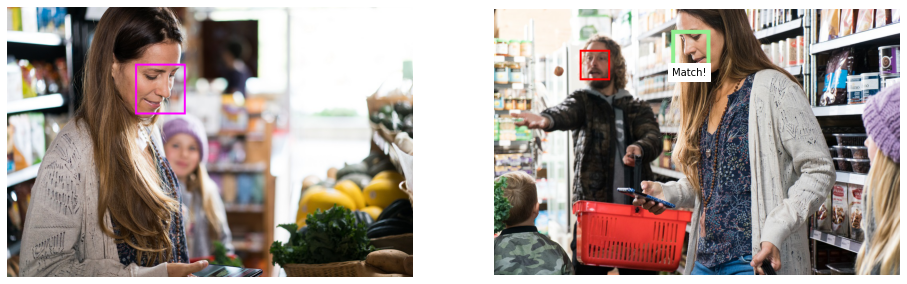

In [25]:
# Obtener el identificador de la primera cara de la imagen 1
image_1_path = os.path.join('../data', 'face', 'store_cam3.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Obtener los identificadores de caras en una segunda imagen
image_2_path = os.path.join('../data', 'face', 'store_cam2.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Encontrar las caras de la imagen 2 que sean similares a la de la imagen 1
similar_faces = client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Mostrar la cara de la imagen 1 y las caras similares de la imagen 2 (código en python_code/face.py)
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)

## Reconocimiento de caras

Hasta ahora, hemos visto que Face puede detectar caras y características faciales e identificar dos caras similares entre sí. Podemos ir más allá si implementamos una solución de *reconocimiento facial* en la que se entrene a Face para reconocer la cara de una persona en concreto. Esto puede ser útil en diferentes casos, como para etiquetar fotografías de amigos automáticamente en redes sociales o usar el reconocimiento facial como un sistema biométrico de verificación de identidad.

Para ver cómo funciona, supongamos que Northwind Traders quiere usar el reconocimiento facial para garantizar que solo los empleados autorizados del departamento de TI pueda acceder a los sistemas seguros.

Lo primero que haremos es crear un *grupo de personas* que represente a los empleados autorizados.

In [26]:
group_id = 'employee_group_id'
try:
    # Elimine el grupo si ya existe
    client.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    client.person_group.create(group_id, 'employees')
    print ('Group created!')

(PersonGroupNotFound) Person group is not found. (Parameter 'personGroupId')
Group created!


Una vez creado el *grupo de personas*, podemos agregar una *persona* para cada empleado que queramos incluir en el grupo y, después, agregar varias fotografías de cada persona para que Face pueda analizar las características faciales de cada persona. Lo ideal es que las imágenes muestren a la misma persona con diferentes poses y gestos.

Agregaremos un solo empleado llamado Wendell y tres fotografías suyas.

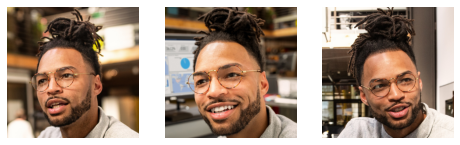

In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Agregar una persona (Wendell) al grupo
wendell = client.person_group_person.create(group_id, 'Wendell')

# Obtener una foto de Wendell
folder = os.path.join('../data', 'face', 'wendell')
wendell_pics = os.listdir(folder)

# Registrar las fotos
i = 0
fig = plt.figure(figsize=(8, 8))
for pic in wendell_pics:
    # Agregue cada foto a la persona en el grupo de personas
    img_path = os.path.join(folder, pic)
    img_stream = open(img_path, "rb")
    client.person_group_person.add_face_from_stream(group_id, wendell.person_id, img_stream)

    # Muestre cada imagen
    img = Image.open(img_path)
    i +=1
    a=fig.add_subplot(1,len(wendell_pics), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()

Una vez agregadas la persona y las fotografías, podemos entrenar a Face para que reconozca a Wendell.

In [29]:
client.person_group.train(group_id)
print('Trained!')

Trained!


Una vez entrenado el modelo, podemos usarlo para identificar caras reconocidas en una imagen.

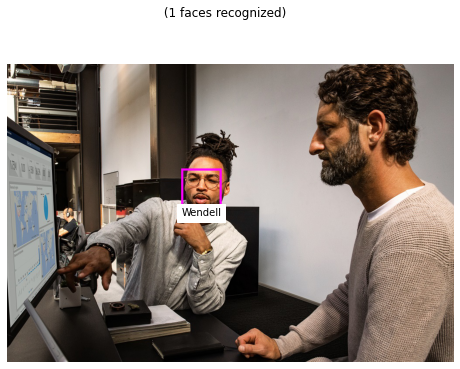

In [30]:
# Obtener los identificadores de caras en una segunda imagen
image_path = os.path.join('../data', 'face', 'employees.jpg')
image_stream = open(image_path, "rb")
image_faces = client.face.detect_with_stream(image=image_stream)
image_face_ids = list(map(lambda face: face.face_id, image_faces))

# Obtener los nombres de caras reconocidas
face_names = {}
recognized_faces = client.face.identify(image_face_ids, group_id)
for face in recognized_faces:
    person_name = client.person_group_person.get(group_id, face.candidates[0].person_id).name
    face_names[face.face_id] = person_name

# Mostrar las caras reconocidas
faces.show_recognized_faces(image_path, image_faces, face_names)



## Más información

Para más información sobre el servicio Face, de Cognitive Services, consulte la [documentación de Face](https://docs.microsoft.com/azure/cognitive-services/face/).
